# Recommender Systems - Collaborative Filtering Algorithm
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as sio
#sns.set(context="notebook", style="white", palette="RdBu")
import seaborn as sns

# Loading movie ratings dataset
---
You will start by loading the movie ratings dataset to understand the structure of the data. This dataset consists of ratings on a scale of 1 to 5. The dataset has $n_u$ = 943 users, and $n_m$ = 1682 movies.

In [2]:
# Loading movie ratings dataset
movies_mat = sio.loadmat('ex8_movies.mat')
movies_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [3]:
Y, R = movies_mat.get('Y'), movies_mat.get('R')
Y.shape, R.shape

((1682, 943), (1682, 943))

In [4]:
# Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies on 943 users
# R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i

# From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1 (Toy Story) : ' + str(Y[0,np.where(R[0,:]==1)[0]].mean()) + ' / 5')

Average rating for movie 1 (Toy Story) : 3.8783185840707963 / 5


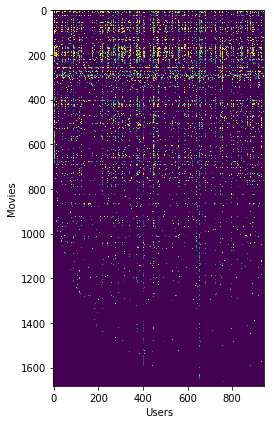

In [5]:
# We can "visualize" the ratings matrix by plotting it 
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(Y)
ax.set_xlabel('Users')
ax.set_ylabel('Movies')
fig.tight_layout()
plt.show()

# Collaborative Filtering Cost Function 
---
You will now implement the cost function for collaborative filtering.  
To help you debug your cost function, we have included set of weights that we trained on that. Specifically, you should complete the code in cofiCostFunc to return J.

In [6]:
param_mat = sio.loadmat('ex8_movieParams.mat')
theta, X = param_mat.get('Theta'), param_mat.get('X')
theta.shape, X.shape

((943, 10), (1682, 10))

In [7]:
# Reduce the data set size so that this runs faster
num_users = 4; num_movies = 5; num_features = 3;
X = X[:num_movies, :num_features]
theta = theta[:num_users, :num_features]
Y = Y[:num_movies, :num_users]
R = R[:num_movies, :num_users]
X, theta, Y, R

(array([[ 1.0486855 , -0.40023196,  1.19411945],
        [ 0.78085123, -0.38562591,  0.52119779],
        [ 0.64150886, -0.54785385, -0.08379638],
        [ 0.45361782, -0.80021844,  0.68048129],
        [ 0.93753789,  0.1060899 ,  0.36195295]]),
 array([[ 0.28544362, -1.68426509,  0.26293877],
        [ 0.50501321, -0.45464846,  0.31746244],
        [-0.43191656, -0.47880449,  0.84671111],
        [ 0.72859839, -0.27189391,  0.3268436 ]]),
 array([[5, 4, 0, 0],
        [3, 0, 0, 0],
        [4, 0, 0, 0],
        [3, 0, 0, 0],
        [3, 0, 0, 0]], dtype=uint8),
 array([[1, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]], dtype=uint8))

## Collaborative filtering optimization objective  
* Given $x^{(1)},...,x^{(n_m)}$, estimate $\theta^{(1)},...,\theta^{(n_u)}$:  
$\qquad \underset{\theta^{(1)},...,\theta^{(n_u)}}{min} \frac{1}{2} \sum\limits_{j=1}^{n_u} \sum\limits_{i:r(i,j)=1} \Big(\big(\theta^{(j)}\big)^T x^{(i)} -y^{(i,j)}\Big)^2 + \frac{\lambda}{2} \sum\limits_{j=1}^{n_u} \sum\limits_{k=1}^{n} \big(\theta_k^{(j)}\big)^2$  
  
   
* Given $\theta^{(1)},...,\theta^{(n_u)}$, estimate $x^{(1)},...,x^{(n_m)}$:  
$\qquad \underset{x^{(1)},...,x^{(n_m)}}{min} \frac{1}{2} \sum\limits_{i=1}^{n_m} \sum\limits_{j:r(i,j)=1} \Big(\big(\theta^{(j)}\big)^T x^{(i)} -y^{(i,j)}\Big)^2 + \frac{\lambda}{2} \sum\limits_{i=1}^{n_m} \sum\limits_{k=1}^{n} \big(x_k^{(i)}\big)^2$  
  
  
* Minimizing $x^{(i)},...,x^{(n_m)}$ and $\theta^{(1)},...,\theta^{(n_u)}$ simultaneously:  
$\qquad J(x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)}) = \frac{1}{2} \sum\limits_{(i,j):r(i,j)=1} \Big(\big(\theta^{(j)}\big)^T x^{(i)}-y^{(i,j)}\Big)^2 + \frac{\lambda}{2} \sum\limits_{i=1}^{n_m} \sum\limits_{k=1}^{n} \big(x_k^{(i)}\big)^2 + \frac{\lambda}{2} \sum\limits_{j=1}^{n_u} \sum\limits_{k=1}^{n} \big(\theta_k^{(j)}\big)^2$

## Collaborative filtering algorithm
1. Initialize $x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)}$ to small random values.  
1. Minimize $J(x^{(1)},...,x^{(n_m)},\theta^{(1)},...,\theta^{(n_u)})$ using gradient descent(or an advanced optimization algorithm). E.g. for every $j=1,...,n_u,i=1,...,n_m$ :  
$x_k^{(i)} := x_k^{(i)} - \alpha \big(\frac{\partial J}{\partial x_k^{(i)}}\big) = x_k^{(i)} - \alpha \Bigg( \sum\limits_{j:r(i,j)=1} \Big(\big(\theta^{(j)}\big)^T x^{(i)} -y^{(i,j)}\Big) \theta_k^{(j)} + \lambda x_k^{(i)}\big) \Bigg)$  
$\theta_k^{(j)} := \theta_k^{(j)} - \alpha \big(\frac{\partial J}{\partial \theta_k^{(j)}}\big) = \theta_k^{(j)} - \alpha \Bigg( \sum\limits_{i:r(i,j)=1} \Big(\big(\theta^{(j)}\big)^T x^{(i)} -y^{(i,j)}\Big) x_k^{(i)} + \lambda \theta_k^{(j)}\big) \Bigg)$  

1. For a user with parameters $\theta$ and a moive with(learned) feature $x$, predict a star rating of $\theta^Tx$.

In [8]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda):    
    X = params[:num_movies * num_features].reshape(num_movies, num_features);
    Theta = params[num_movies * num_features:].reshape(num_users, num_features);

    error = np.multiply(X @ Theta.T - Y, R)
    J = np.power(error, 2).sum() / 2
    J = J + Lambda / 2 * np.power(Theta, 2).sum()
    J = J + Lambda / 2 * np.power(X, 2).sum()
    
    # calculate the gradients
    X_grad = error @ Theta + Lambda * X
    Theta_grad = error.T @ X + Lambda * Theta
    
    # unravel the gradient matrices into a single array
    grad = np.concatenate((np.ravel(X_grad), np.ravel(Theta_grad)))
    return J, grad

In [9]:
# test cost without regularization - lambda = 0, result is about 22.225
Lambda = 0
params = np.concatenate((np.ravel(X), np.ravel(theta)))
cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)

(22.224603725685675,
 array([ -2.52899165,   7.57570308,  -1.89979026,  -0.56819597,
          3.35265031,  -0.52339845,  -0.83240713,   4.91163297,
         -0.76677878,  -0.38358278,   2.26333698,  -0.35334048,
         -0.80378006,   4.74271842,  -0.74040871, -10.5680202 ,
          4.62776019,  -7.16004443,  -3.05099006,   1.16441367,
         -3.47410789,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ]))

# Collaborative Filtering Gradient
---
Once your cost function matches up with ours, you should now implement the collaborative filtering gradient function. Specifically, you should complete the code in cofiCostFunc to return the grad argument.

In [10]:
def computeNumericalGradient(params, Y, R, num_users, num_movies, num_features, Lambda):
    Len = np.size(params)
    numeric_grad = np.zeros(Len)
    perturb = np.zeros(Len)
    EPSILON = 1e-4
    for p in range(Len):
        # Set perturbation vector
        perturb[p] = EPSILON;
        loss1, _ = cofiCostFunc(params - perturb, Y, R, num_users, num_movies, num_features, Lambda)
        loss2, _ = cofiCostFunc(params + perturb, Y, R, num_users, num_movies, num_features, Lambda)
        # Compute Numerical Gradient
        numeric_grad[p] = (loss2 - loss1) / (2 * EPSILON)
        perturb[p] = 0;
    _, analytic_grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)
    return numeric_grad, analytic_grad

In [11]:
def checkNNGradients(Lambda=0):
# Creates a collaborative filering problem to check your cost function 
# and gradients, it will output the analytical gradients produced 
# by your code and the numerical gradients 
# (computed using computeNumericalGradient). 
# These two gradient computations should result in very similar values.

    # Create small problem
    X_t = np.random.rand(4, 3);
    Theta_t = np.random.rand(5, 3);

    # Zap out most entries
    Y = X_t @ Theta_t.T;
    R = np.ones([Y.shape[0], Y.shape[1]]);
    v_rand_zero = np.random.rand(Y.shape[0], Y.shape[1]) > 0.5;
    
    Y = np.multiply(Y, v_rand_zero);
    R = np.multiply(R, v_rand_zero);
    
    # Run Gradient Checking
    X = np.random.normal(0, 1, X_t.shape);
    Theta = np.random.normal(0, 1, Theta_t.shape);
    num_users = Y.shape[1];
    num_movies = Y.shape[0];
    num_features = Theta_t.shape[1];

    # Unroll parameters(serialize)
    #nn_params = [Theta1(:) ; Theta2(:)];
    params = np.concatenate((np.ravel(X), np.ravel(Theta)))
    # deserialize
    # seq[:25 * 401].reshape(25, 401), seq[25 * 401:].reshape(10, 26)

    numeric_grad, analytic_grad = computeNumericalGradient(params, Y, R, num_users, num_movies, num_features, Lambda)

    # Visually examine the two gradient computations.  The two columns
    # you get should be very similar. 
    print(np.vstack((numeric_grad, analytic_grad)).T)
    print()
    print('The above two columns you get should be very similar.')
    print('(Left-Your Numerical Gradient, Right-Analytical Gradient)')
    print()
    
    # Evaluate the norm of the difference between two solutions.  
    # If you have a correct implementation, and assuming you used EPSILON = 0.0001 
    # then diff below should be less than 1e-9
    diff = np.linalg.norm(numeric_grad - analytic_grad) / np.linalg.norm(numeric_grad + analytic_grad);

    print('If your backpropagation implementation is correct, ')
    print('then the relative difference will be small (less than 1e-9). ')
    print('Relative Difference: {0}'.format(diff))
    
    print()
    print('Debugging:')
    print('np.linalg.norm(numeric_grad - analytic_grad) : ' + str(np.linalg.norm(numeric_grad - analytic_grad)))
    print('np.linalg.norm(numeric_grad + analytic_grad) : ' + str(np.linalg.norm(numeric_grad + analytic_grad)))

In [12]:
# Check gradients by running checkNNGradients.
# In fact, the gradient is detected by the cost function.
# So, first, you must make sure your Cost Function is correct.
checkNNGradients()

[[  1.82044494   1.82044494]
 [  1.32878147   1.32878147]
 [ -1.90505488  -1.90505488]
 [  0.4469771    0.4469771 ]
 [ -0.21355701  -0.21355701]
 [ -0.20989966  -0.20989966]
 [-11.87268517 -11.87268517]
 [ 12.80757761  12.80757761]
 [ -8.65865963  -8.65865963]
 [  2.66870133   2.66870133]
 [  4.20178983   4.20178983]
 [  3.01527694   3.01527694]
 [  3.09790633   3.09790633]
 [ -9.34332756  -9.34332756]
 [  5.17912293   5.17912293]
 [ -0.78920657  -0.78920657]
 [ -1.55316232  -1.55316232]
 [  0.57152664   0.57152664]
 [ -3.37111952  -3.37111952]
 [ -1.08482005  -1.08482005]
 [ -0.13967992  -0.13967992]
 [  0.99651679   0.99651679]
 [ -1.40730623  -1.40730623]
 [  1.33067517   1.33067517]
 [  1.28624849   1.28624849]
 [ -3.59551684  -3.59551684]
 [  1.83889018   1.83889018]]

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, 
then the relative difference will be small (less t

# Collaborative Filtering Cost Regularization 
---
Now, you should implement regularization for the cost function for collaborative filtering. You can implement it by adding the cost of regularization to the original cost computation.

In [13]:
# test cost with regularization - lambda = 1.5, result is about 31.34
Lambda = 1.5
params = np.concatenate((np.ravel(X), np.ravel(theta)))
cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)

(31.34405624427422,
 array([ -0.95596339,   6.97535514,  -0.10861109,   0.60308088,
          2.77421145,   0.25839822,   0.12985616,   4.0898522 ,
         -0.89247334,   0.29684395,   1.06300933,   0.66738144,
          0.60252677,   4.90185327,  -0.19747928, -10.13985478,
          2.10136256,  -6.76563628,  -2.29347024,   0.48244098,
         -2.99791422,  -0.64787484,  -0.71820673,   1.27006666,
          1.09289758,  -0.40784086,   0.49026541]))

# Collaborative Filtering Gradient Regularization 
---
Once your cost matches up with ours, you should proceed to implement regularization for the gradient. 

In [14]:
# Checking Backpropagation with Regularization ...
# Check gradients by running checkNNGradients
Lambda = 1.5;
checkNNGradients(Lambda);

[[  3.4597977    3.4597977 ]
 [ -4.24651931  -4.24651931]
 [  3.01503461   3.01503461]
 [ -1.29296426  -1.29296426]
 [  6.61074764   6.61074764]
 [  0.24860943   0.24860943]
 [ -2.29037835  -2.29037835]
 [  4.69284124   4.69284124]
 [  9.11993307   9.11993307]
 [  3.12521303   3.12521303]
 [ 19.12176419  19.12176419]
 [ 19.11751007  19.11751007]
 [  2.58717316   2.58717316]
 [-12.03732433 -12.03732433]
 [ -1.44883147  -1.44883147]
 [  5.72454016   5.72454016]
 [  6.43083804   6.43083804]
 [  4.53724274   4.53724274]
 [  1.36513832   1.36513832]
 [ -2.07809915  -2.07809915]
 [ -2.1873981   -2.1873981 ]
 [  1.53125782   1.53125782]
 [  0.73619352   0.73619352]
 [ -3.24053744  -3.24053744]
 [  0.11651994   0.11651994]
 [-17.33930002 -17.33930002]
 [-23.66448912 -23.66448912]]

The above two columns you get should be very similar.
(Left-Your Numerical Gradient, Right-Analytical Gradient)

If your backpropagation implementation is correct, 
then the relative difference will be small (less t

# Entering ratings for a new user 
---
Before we will train the collaborative filtering model, we will first add ratings that correspond to a new user that we just observed. This part of the code will also allow you to put in your own ratings for the movies in our dataset!

In [15]:
# Reads the fixed movie list in movie.txt and returns a cell array of the words in movieList.
movie_list = []
with open('movie_ids.txt', encoding='GBK') as f:
    for line in f:
        tokens = line.strip().split(' ')
        movie_list.append(' '.join(tokens[1:]))
movie_list[0:5]

['Toy Story (1995)',
 'GoldenEye (1995)',
 'Four Rooms (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)']

In [16]:
# Initialize my ratings
my_ratings = np.zeros([1682, 1]);

In [17]:
# Check the file movie_idx.txt for id of each movie in our dataset
# For example, Toy Story (1995) has ID 0, so to rate it "4", you can set
my_ratings[0] = 4;

In [18]:
# Or suppose did not enjoy Silence of the Lambs (1991), you can set
my_ratings[97] = 2;

In [19]:
# We have selected a few movies we liked / did not like and the ratings we gave are as follows:
my_ratings[6]   = 3;
my_ratings[11]  = 5;
my_ratings[53]  = 4;
my_ratings[63]  = 5;
my_ratings[65]  = 3;
my_ratings[68]  = 5;
my_ratings[182] = 4;
my_ratings[225] = 5;
my_ratings[354] = 5;

In [20]:
print('New user ratings:')
for i in range(len(my_ratings)):
    if my_ratings[i] > 0:
        print('Rated ' + str(int(my_ratings[i])) + ' for  ' + movie_list[i]);

New user ratings:
Rated 4 for  Toy Story (1995)
Rated 3 for  Twelve Monkeys (1995)
Rated 5 for  Usual Suspects, The (1995)
Rated 4 for  Outbreak (1995)
Rated 5 for  Shawshank Redemption, The (1994)
Rated 3 for  While You Were Sleeping (1995)
Rated 5 for  Forrest Gump (1994)
Rated 2 for  Silence of the Lambs, The (1991)
Rated 4 for  Alien (1979)
Rated 5 for  Die Hard 2 (1990)
Rated 5 for  Sphere (1998)


# Learning Movie Ratings 
---
Now, you will train the collaborative filtering model on a movie rating dataset of 1682 movies and 943 users

In [63]:
# Loading movie ratings dataset
movies_mat = sio.loadmat('ex8_movies.mat')
movies_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Y', 'R'])

In [64]:
#  Y is a 1682x943 matrix, containing ratings (1-5) of 1682 movies by 943 users
#  R is a 1682x943 matrix, where R(i,j) = 1 if and only if user j gave a rating to movie i
Y, R = movies_mat.get('Y'), movies_mat.get('R')
Y.shape, R.shape

((1682, 943), (1682, 943))

In [65]:
Y = np.append(my_ratings, Y, axis=1);
R = np.append(my_ratings != 0, R, axis=1);
#Y = np.append(Y, my_ratings, axis=1);
#R = np.append(R, my_ratings != 0, axis=1);
Y.shape, R.shape, my_ratings.shape

((1682, 944), (1682, 944), (1682, 1))

In [66]:
#  Normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
Ymean = Y.sum(1) / R.sum(1);
#Ynorm = np.multiply(np.fabs(Y - np.array([Ymean]).T), R);
Ynorm = np.multiply(Y - np.array([Ymean]).T, R);
Ynorm.mean()

7.338986115742988e-19

In [67]:
#  Useful Values
num_users = Y.shape[1];
num_movies = Y.shape[0];
num_features = 10;

In [75]:
#  Set Initial Parameters (Theta, X)
#  standard_normal() equal normal(0, 1, ())
X = np.random.standard_normal((num_movies, num_features))
Theta = np.random.normal(0, 1, (num_users, num_features))
#X = np.random.random(size=(num_movies, num_features))
#Theta = np.random.random(size=(num_users, num_features))
initial_parameters = np.concatenate((np.ravel(X), np.ravel(Theta)))

In [76]:
# Training collaborative filtering...
import scipy.optimize as opt
Lambda = 10;
res = opt.minimize(fun=cofiCostFunc,
                   x0=initial_parameters,
                   args=(Ynorm, R, num_users, num_movies, num_features, Lambda),
                   method='CG',
                   jac=True,
                   options={'maxiter': 100});
res

     fun: 38966.517219837246
     jac: array([ 0.07539294, -0.06962027,  0.04445066, ..., -0.03049742,
       -0.00491371, -0.02897106])
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 152
     nit: 100
    njev: 152
  status: 1
 success: False
       x: array([ 0.19350428,  0.88991223,  0.54067607, ...,  0.60746353,
       -0.17028245,  0.32069972])

In [86]:
# Unfold the returned theta back into U and W
X = np.reshape(res.x[:num_movies * num_features], (num_movies, num_features))
Theta = np.reshape(res.x[num_movies * num_features:], (num_users, num_features))

print('Recommender system learning completed.');
X.shape, Theta.shape

Recommender system learning completed.


((1682, 10), (944, 10))

# Recommendation for you 
---
After training the model, you can now make recommendations by computing the predictions matrix.

In [186]:
p = X @ Theta.T;
my_predictions = p[:, 0] + Ymean
idx = np.argsort(my_predictions, axis=0)[::-1] # Descending order

In [187]:
print("Top 10 movie predictions:")
for i in range(10):
    star_rating = my_predictions[idx][:10];
    movie_name = np.array(movie_list).T[idx];
    print('Predicted rating of 【{0}】 \t for movie 【{1}】.'.format(str(star_rating[i]), movie_name[i]))

Top 10 movie predictions:
Predicted rating of 【5.000000858313845】 	 for movie 【Saint of Fort Washington, The (1993)】.
Predicted rating of 【5.000000474151429】 	 for movie 【Star Kid (1997)】.
Predicted rating of 【5.0000000767356525】 	 for movie 【They Made Me a Criminal (1939)】.
Predicted rating of 【5.000000049175514】 	 for movie 【Entertaining Angels: The Dorothy Day Story (1996)】.
Predicted rating of 【4.9999999983937276】 	 for movie 【Great Day in Harlem, A (1994)】.
Predicted rating of 【4.999999846275929】 	 for movie 【Marlene Dietrich: Shadow and Light (1996)】.
Predicted rating of 【4.999999786058626】 	 for movie 【Santa with Muscles (1996)】.
Predicted rating of 【4.999999688849941】 	 for movie 【Prefontaine (1997)】.
Predicted rating of 【4.999999566109666】 	 for movie 【Aiqing wansui (1994)】.
Predicted rating of 【4.9999993895435475】 	 for movie 【Someone Else's America (1995)】.
